In [2]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black
import ncxt_sxtcnn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [3]:
import logging

logger = logging.getLogger("ncxt_sxtcnn.sxtcnn").setLevel(logging.ERROR)

<IPython.core.display.Javascript object>

In [4]:
from ncxt_sxtcnn.sxtcnn.loaders import AmiraLoaderx100
from ncxt_sxtcnn.sxtcnn.models import UNet3D
from ncxt_sxtcnn.sxtcnn.processors import RandomBlockProcessor
from ncxt_sxtcnn.sxtcnn.criteria import CrossEntropyLoss_DiceLoss

<IPython.core.display.Javascript object>

### Setup Database

In [5]:
from ncxt_sxtcnn.hxdatabase import Database

db = Database("mockdata/")
membrane = ["membrane"]
nucleus = ["euchromatin", "heterochromatin", "nucleus", "nucleolus"]
nucleolus = ["nucleolus"]
hxfiles = db.filelist(membrane, nucleus, nucleolus)
db.dataframe_sel(membrane, nucleus)

mockdata/


C:\Users\axela\Miniconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\axela\Miniconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,project,sample,endoplasmic reticulum,granule,ignore,lipid,membrane,mitochondria,nucleolus,nucleus,void,void1
0,pi1,sample_12,7,4,9,6,8,5,3,2,0,1
1,pi2,sample_9,4,,,2,6,3,5,1,0,


<IPython.core.display.Javascript object>

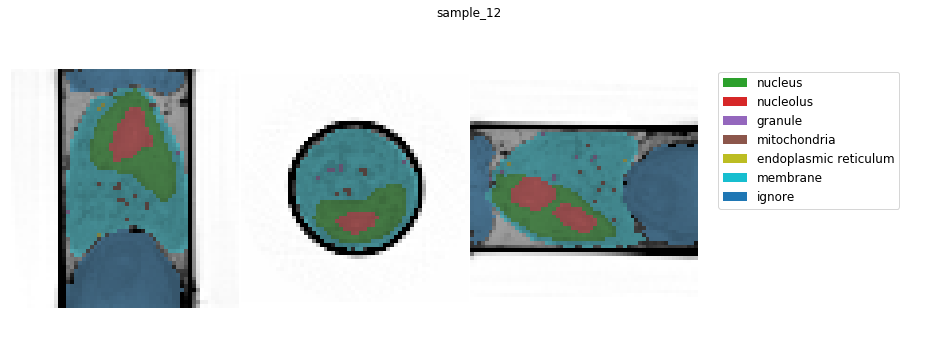

<IPython.core.display.Javascript object>

In [6]:
import ncxtamira

proj = ncxtamira.CellProject(hxfiles[0])
proj.preview()

In [7]:
from ncxt_sxtcnn import Segmenter

files = db.filelist(membrane, nucleus, nucleolus)
features = [["*"], nucleus, nucleolus]
working_directory = "C:/Users/axela/Documents/2020/example_wd/"

loader_args = {"files": files, "features": features}

processor_args = {"block_shape": (16, 16, 16), "binning": 1}

model_args = {
    "num_classes": len(features) + 1,
    "depth": 2,
    "start_filts": 32,
    "dropout": None,
    "instancenorm": True,
}
crit_args = dict()
settings = {"maximum_iterations": 10}

segmenter = Segmenter(
    AmiraLoaderx100,
    RandomBlockProcessor,
    UNet3D,
    CrossEntropyLoss_DiceLoss,
    loader_args,
    processor_args,
    model_args,
    crit_args,
    settings,
)
segmenter.folder = working_directory
segmenter.fold = 0

C:\Users\axela\Miniconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<IPython.core.display.Javascript object>

In [8]:
instance = segmenter.sxtcnn(0)
instance.run()

<IPython.core.display.Javascript object>

In [12]:
instance = segmenter.sxtcnn(0)
instance.run(show_progress=False)

<IPython.core.display.Javascript object>

In [11]:
instance.run()

<IPython.core.display.Javascript object>

In [15]:
print(instance.device.split(":")[1])

2


<IPython.core.display.Javascript object>

In [7]:
class Status():
    def __init__(self):
        self.c =0
        
status = Status()

def callback(inst):
    print('epcoch', inst.epoch)
    status.c+=1
    


<IPython.core.display.Javascript object>

AttributeError: 'SXTCNN' object has no attribute 'model_size'

<IPython.core.display.Javascript object>

epcoch 1
epcoch 2
epcoch 3
epcoch 4
epcoch 5
epcoch 6
epcoch 7
epcoch 8
epcoch 9
epcoch 10



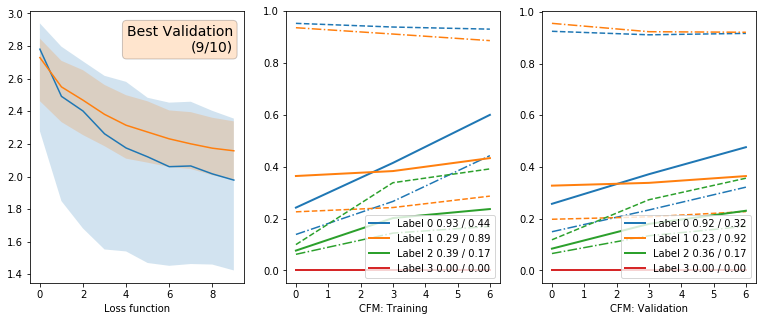

<IPython.core.display.Javascript object>

In [8]:
instance.iter_callback = callback
instance.run()
instance.logger.plot()

In [9]:
print(status.c)

10


<IPython.core.display.Javascript object>